# Import all kind of stuff

In [1]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from theory.utilities.cpd5 import get_color, get_colors
from theory.utilities.cpd5 import (
    seeblau120,
    seeblau100,
    seeblau80,
    seeblau65,
    seeblau35,
    seeblau20,
)
from theory.utilities.cpd5 import (
    seegrau100,
    seegrau80,
    seegrau65,
    seegrau35,
    seegrau20,
)

from theory.utilities.constants import k_B_meV, G_0_muS, e, h

from theory.models.bcs import Delta_meV_of_T
from theory.models.bcs import N_of_E
from theory.models.bcs import f_of_E
from theory.models.bcs import get_I_nA as get_I_nA_bcs

from theory.models.tg import get_I_pat_nA as get_I_nA_tg

sys.path.append("/Users/oliver/Documents/doctoral-thesis/.utilities/")

from layout import get_figure, theory_layout

from matplotlib_inline.backend_inline import InlineBackend

InlineBackend.print_figure_kwargs = {"bbox_inches": None, "pad_inches": 0.0}

# Set plot fontsizes

In [2]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [3]:
textwidth = 4.25279  # in
textheight = 6.85173

print(
    " 1.0",
    textwidth,
    textheight,
    "\n",
    "0.9",
    0.9 * textwidth,
    0.9 * textheight,
    "\n",
    "0.8",
    0.8 * textwidth,
    0.8 * textheight,
    "\n",
    "0.7",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.6",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.5",
    0.5 * textwidth,
    0.5 * textheight,
    "\n",
    "0.4",
    0.4 * textwidth,
    0.4 * textheight,
    "\n",
)

 1.0 4.25279 6.85173 
 0.9 3.8275110000000003 6.166557 
 0.8 3.402232 5.481384 
 0.7 2.976953 4.796211 
 0.6 2.976953 4.796211 
 0.5 2.126395 3.425865 
 0.4 1.701116 2.740692 



# $\Delta(r)$

In [4]:
x = np.linspace(0, 4 * 2 * np.pi, 361)
barrier_width = 0.25 * np.pi
barrier_0 = 4 * np.pi
x_barrier0 = barrier_0 - barrier_width / 2
x_barrier1 = barrier_0 + barrier_width / 2

damping = 10 * np.pi
damping1 = np.where(
    x < x_barrier0,
    1.0,
    np.exp((x_barrier0 - x) / damping),
)
damping2 = np.where(
    x > x_barrier1,
    1.0,
    np.exp((-x_barrier1 + x) / damping),
)

nu = 1
phi = 1 * np.pi
phi_0 = np.pi / 2
phi_off = np.pi / 2

psi1 = np.sin((x / (nu) - (phi_0))) ** 1
psi2 = np.sin((x / (nu) - (phi_0 + phi))) ** 1
psi1 *= damping1
psi2 *= damping2

psi_half = 0
psi_min = -1
psi_max = 1

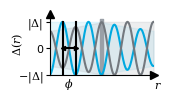

In [5]:
fig, ax = get_figure(figsize=(1.7, 0.85))

# damping
ax.fill_between(x, +damping1, -damping1, color=get_color("seeblau", "35", alpha=0.25))
ax.fill_between(x, +damping2, -damping2, color=get_color("seegrau", "35", alpha=0.25))


# barrier
ax.fill_between(
    x=[x_barrier0, x_barrier1],
    y1=[psi_min, psi_min],
    y2=[psi_max * 1.1, psi_max * 1.1],
    color=seegrau65,
    alpha=1,
)

# wave function
ax.plot(x, psi1, color=get_color("seeblau", "100"))
ax.plot(x, psi2, color=get_color("seegrau", "80"))

# ax.plot(x, +damping1, "--", color=get_color("seeblau", "100"))
# ax.plot(x, -damping1, "--", color=get_color("seeblau", "100"))
# ax.plot(x, +damping2, "--", color=get_color("seegrau", "80"))
# ax.plot(x, -damping2, "--", color=get_color("seegrau", "80"))

color = "k"
ax.plot(
    [phi_off + phi_0, phi_off + phi_0 + phi],
    [psi_half, psi_half],
    "-",
    color=color,
)
ax.plot([phi_off + phi_0, phi_off + phi_0], [psi_min, psi_max], "-", color=color)
ax.plot(
    [phi_off + phi_0 + phi, phi_off + phi_0 + phi], [psi_min, psi_max], "-", color=color
)
ax.plot([phi_off + phi_0 + phi], [psi_half], ">", color=color, clip_on=False, ms=3)
ax.plot([phi_off + phi_0], [psi_half], "<", color=color, clip_on=False, ms=3)

ax.set_ylim(psi_min, psi_max * 1.3)
ax.set_xlim(np.min(x), np.max(x))

ax.set_xticks([phi_off + phi_0, phi_off + phi_0 + phi], ["$\\phi1$", "$\\phi_2$"])
ax.set_xticks([phi_off + phi_0 + phi / 2], ["$\\phi$"])
# ax.set_xticks([])
ax.set_yticks([-1, 0, 1], ["$-|\\Delta|$", "0", "$|\\Delta|$"])
# ax.set_yticks([])


title = "delta-r"
xlabel = "$r$"
ylabel = "$\\Delta (r)$"

ax.tick_params(
    axis="x",
    color="white",
    length=0,
)

theory_layout(fig, ax, title, xlabel, ylabel, padding=(0.5, 0.08))

# Josephson $I(\phi)$

In [56]:
phi = np.linspace(0, 2.64 * np.pi, 361)
I_J_phi = np.sin(phi)

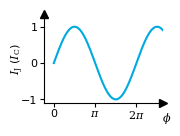

In [57]:
fig, ax = plt.subplots(figsize=(1.7, 1.2))
ax.plot(
    phi,
    I_J_phi,
    color=seeblau100,
)

ax.set_ylim((-1.1, 1.35))
ax.set_yticks([0, 1, -1])

ax.set_xlim([-0.24 * np.pi, 2.64 * np.pi])
ax.set_xticks([0, np.pi, 2 * np.pi], labels=["0", "$\\pi$", "$2\\pi$"])

xlabel = "$\\phi$"
ylabel = "$I_\\mathrm{J}$ ($I_\\mathrm{C}$)"
title = "josephson-iphi"

theory_layout(fig, ax, title, xlabel, ylabel)

# Josephson $I(t)$

In [58]:
from theory.utilities.constants import k_B_meV, G_0_muS, e, h

Delta_meV = 0.180
t_ps = np.linspace(0, 30, 1001)  # ns
V_mV = np.array([Delta_meV])
I_C = np.pi / 2
phi_0 = 0.0

nu_0_GHz = 2 * e / h * V_mV * 1e-3 * 1e-9
t_0_ps = 1 / nu_0_GHz

phi = np.zeros((t_ps.shape[0], V_mV.shape[0]))
for i, v_mV in enumerate(V_mV):
    phi[:, i] = phi_0 + 2 * np.pi * nu_0_GHz[i] * t_ps * 1e-3

I_J = I_C * np.sin(phi)
t_0_ps

array([0.01148797])

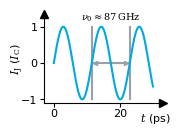

In [59]:
fig, ax = plt.subplots(figsize=(1.7, 1.2))

for i, v_mV in enumerate(V_mV):
    ax.plot(
        t_ps,
        I_J[:, i] / I_C,
        color=seeblau100,
        zorder=10,
    )
t_0 = 1e3 / nu_0_GHz[0]
ax.plot([t_0, 2 * t_0], [0, 0], "-", color=seegrau65)
ax.plot([t_0, t_0], [-1, 1], "-", color=seegrau65)
ax.plot([2 * t_0, 2 * t_0], [-1, 1], "-", color=seegrau65)
ax.plot([2 * t_0 - 1], [0], ">", color=seegrau65, clip_on=False, ms=3)
ax.plot([t_0 + 1], [0], "<", color=seegrau65, clip_on=False, ms=3)
ax.text(
    t_0 * 1.5,
    1.25,
    "$\\nu_0 \\approx 87\\,\\mathrm{GHz}$",  # t_0 \\approx 11\\,\\mathrm{ps},
    color="k",
    ha="center",
    va="center",
    fontsize=7,
)

ax.set_ylim((-1.1, 1.35))
ax.set_yticks([0, 1, -1])

ax.set_xlim([-3, 33])
ax.set_xticks([0, 20])

xlabel = "$t$ (ps)"
ylabel = "$I_\\mathrm{J}$ ($I_\\mathrm{C}$)"
title = "josephson-it"

theory_layout(fig, ax, title, xlabel, ylabel)

# Josephson $I(V)$
https://en.wikipedia.org/wiki/Josephson_effect#/media/File:I-V_characteristics_of_Josephson_Junction.JPG

In [60]:
Delta_meV = 0.18
gamma_meV = 0.0
T_K = 0.0
V_0 = np.linspace(0, 3.08, 281)
G_N = 0.001
I_C = np.pi / 2

from theory.models.bcs import get_I_nA as get_I_nA_bcs

I_bcs = get_I_nA_bcs(
    V_mV=V_0 * Delta_meV,
    Delta_meV=Delta_meV,
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
) / (Delta_meV * G_0_muS * G_N)
I = np.concatenate((np.array([0.0, I_C]), I_bcs))
V = np.concatenate((np.array([0.0, 0.0]), V_0))

I = np.concatenate((-np.flip(I), I))
V = np.concatenate((-np.flip(V), V))

V_mV = V * Delta_meV

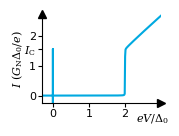

In [61]:
fig, ax = plt.subplots(figsize=(1.7, 1.2))

ax.plot(
    V,
    I,
    color=seeblau100,
)

ax.set_xlim([-0.3, 3])
ax.set_xticks([0, 1, 2], labels=["0", "1", "2"])

ax.set_ylim([-0.25, 2.75])
ax.set_yticks([0, 1, 2, I_C], labels=["0", "1", "2", "$I_\\mathrm{C}$"])

xlabel = "$eV/\\Delta_0$"
ylabel = "$I\\ (G_\\mathrm{N}\\Delta_0/e)$"
title = "josephson-iv"

theory_layout(fig, ax, title, xlabel, ylabel)

# $I_C(T)$ Ambegaokar-Baratoff

In [62]:
Delta_0_meV = 0.18
T_C_K = Delta_0_meV / (1.764 * k_B_meV)
T_K = np.linspace(0, T_C_K, 101)
Delta_T_meV = np.zeros_like(T_K)
for i, T in enumerate(T_K):
    Delta_T_meV[i] = Delta_meV_of_T(Delta_meV=Delta_0_meV, T_K=T)
I_C_nA = np.pi / 2 * Delta_0_meV
I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA
I_C_lin = (T_C_K - T_K) * 635e-3 / I_C_nA
I_C_lin[I_C_lin > 1.0] = np.nan

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_13468/3616836601.py:8: RuntimeWarning: divide by zero encountered in divide
  I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA


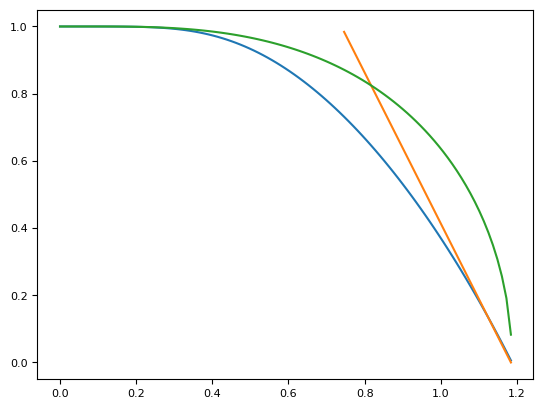

In [63]:
plt.plot(T_K, I_C_AB)
plt.plot(T_K, I_C_lin)
plt.plot(T_K, Delta_T_meV / Delta_0_meV)

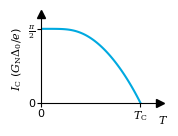

In [64]:
fig, ax = plt.subplots(figsize=(1.7, 1.2))

# Plot the simplified gap curve
ax.plot(T_K / T_C_K, I_C_AB, color=seeblau100)

ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_yticks([0, 1], labels=["0", "$\\frac{\\pi}{2}$"])
ax.set_xticks([0, 1], labels=["0", "$T_\\mathrm{C}$"])

xlabel = "$T$"
ylabel = "$I_\\mathrm{C}$ ($G_\\mathrm{N}\\Delta_0/e$)"
title = "critical-current"

theory_layout(fig, ax, title, xlabel, ylabel)

# Shapiro Stufen & PAT I(V)

In [65]:
import numpy as np


def add_supercurrent_replicas(
    V_mV: np.ndarray,
    I: np.ndarray,
    *,
    I_C: float,
    nu_GHz: float,
    A_mV: float | np.ndarray | None = None,
    n_max: int = 6,
    charge: int = 2,
    weight: str = "Jn_abs",
    include_n0: bool = True,
) -> tuple[np.ndarray, np.ndarray]:
    """Insert vertical supercurrent lines (and photon replicas) into I(V).

    Inserts a 3-point vertical segment at each replica voltage V_n:
    (V_n, 0), (V_n, +I_n), (V_n, -I_n), where I_n is set by `weight`.

    Parameters
    ----------
    V_mV
        1D voltage axis (mV), strictly increasing is assumed.
    I
        Current array with shape (nV,) or (nA, nV), same V grid for all curves.
    I_C
        Base critical current amplitude (same units as I).
    nu_GHz
        Microwave frequency in GHz.
    A_mV
        AC voltage amplitude in mV. If I is 2D, can be shape (nA,). If None,
        all replica amplitudes are set to I_C (or flat weights).
    n_max
        Highest replica index |n| to include (replicas at n=-n_max..+n_max).
    charge
        Charge in units of e for the replica spacing and alpha.
        Use 2 for Cooper pairs (default).
    weight
        "Jn_abs"  -> I_n = I_C * |J_n(alpha)| (default)
        "Jn"      -> I_n = I_C * J_n(alpha)
        "Jn2"     -> I_n = I_C * (J_n(alpha)**2)
        "flat"    -> I_n = I_C (independent of n and A)
    include_n0
        If True, include the n=0 line at V=0.

    Returns
    -------
    V_new, I_new
        New voltage axis and current array with the same leading dimension(s)
        as input, with 3 points inserted per included replica.
    """
    V = np.asarray(V_mV, dtype=np.float64).reshape(-1)
    if V.ndim != 1 or V.size < 2:
        raise ValueError("V_mV must be a 1D array with at least 2 points")
    if np.any(np.diff(V) <= 0):
        raise ValueError("V_mV must be strictly increasing")

    I_arr = np.asarray(I, dtype=np.float64)
    if I_arr.ndim == 1:
        I2 = I_arr[None, :]
        squeeze = True
    elif I_arr.ndim == 2:
        I2 = I_arr
        squeeze = False
    else:
        raise ValueError("I must have shape (nV,) or (nA, nV)")

    if I2.shape[1] != V.size:
        raise ValueError("I and V_mV must have matching voltage dimension")

    nA = I2.shape[0]

    # Step spacing in mV: V_step = h*nu / (q*e)
    h = 6.62607015e-34
    e = 1.602176634e-19
    nu = float(nu_GHz) * 1e9
    q = float(charge) * e
    V_step_mV = (h * nu / q) * 1e3

    # Include n in [-n_max, ..., +n_max]
    n_list = np.arange(-int(n_max), int(n_max) + 1, dtype=int)
    if not include_n0:
        n_list = n_list[n_list != 0]

    V_rep = n_list.astype(np.float64) * V_step_mV

    # Keep only replicas within axis range (allow slight eps).
    Vmin, Vmax = float(V[0]), float(V[-1])
    keep = (V_rep >= Vmin - 1e-15) & (V_rep <= Vmax + 1e-15)
    n_list = n_list[keep]
    V_rep = V_rep[keep]

    if V_rep.size == 0:
        return V, (I2[0] if squeeze else I2)

    # Compute amplitudes per curve and per n.
    if weight == "flat" or A_mV is None:
        amp = np.full((nA, V_rep.size), float(I_C), dtype=np.float64)
    else:
        try:
            from scipy.special import jv as _Jv
        except Exception as exc:
            raise ImportError("scipy is required for Bessel-weighted replicas") from exc

        A = np.asarray(A_mV, dtype=np.float64).reshape(-1)
        if A.size == 1:
            A = np.full(nA, float(A[0]), dtype=np.float64)
        if A.size != nA:
            raise ValueError("A_mV must be scalar or have shape (nA,)")

        V_ac = A * 1e-3  # mV -> V
        alpha = (q * V_ac) / (h * nu)  # (nA,)

        J = np.empty((nA, V_rep.size), dtype=np.float64)
        for j, n in enumerate(n_list):
            J[:, j] = _Jv(int(n), alpha)

        if weight == "Jn_abs":
            amp = float(I_C) * np.abs(J)
        elif weight == "Jn":
            amp = float(I_C) * J
        elif weight == "Jn2":
            amp = float(I_C) * (J**2)
        else:
            raise ValueError("weight must be one of {'Jn_abs','Jn','Jn2','flat'}")

    # Insert in correct order along V.
    sort = np.argsort(V_rep)
    V_rep = V_rep[sort]
    n_list = n_list[sort]
    amp = amp[:, sort]

    insert_idx = np.searchsorted(V, V_rep, side="left")

    V_parts: list[np.ndarray] = []
    I_parts: list[np.ndarray] = []
    cur = 0
    for k, idx in enumerate(insert_idx):
        V_parts.append(V[cur:idx])
        I_parts.append(I2[:, cur:idx])

        vx = V_rep[k]
        V_ins = np.array([vx, vx, vx], dtype=np.float64)
        I_ins = np.stack([np.zeros(nA), amp[:, k], -amp[:, k]], axis=1)

        V_parts.append(V_ins)
        I_parts.append(I_ins)

        cur = idx

    V_parts.append(V[cur:])
    I_parts.append(I2[:, cur:])

    V_new = np.concatenate(V_parts, axis=0)
    I_new = np.concatenate(I_parts, axis=1)

    return V_new, (I_new[0] if squeeze else I_new)

In [66]:
# generate data
from theory.models.bcs import get_I_nA as get_I_nA_bcs
from theory.models.tg import get_I_pat_nA as get_I_nA_tg

Delta_meV = 0.180
V_mV = np.linspace(-2.5, 2.5, 601) * Delta_meV  # mV
A_mV = np.array([0, 0.1, 0.2]) * Delta_meV  # mV
G_N = 1
T_K = 0.0
gamma_meV = 0.0
nu_GHz = 5.0

I_C = np.pi / 2

I_BCS = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)

I_BCS = get_I_nA_bcs(
    V_mV=V_mV,
    G_N=G_N,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    gamma_meV=gamma_meV,
)
I_PAT = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=I_BCS, nu_GHz=nu_GHz)
I_PAT /= Delta_meV * G_0_muS

V_plot, I_plot = add_supercurrent_replicas(
    V_mV, I_PAT, I_C=I_C, nu_GHz=nu_GHz, A_mV=A_mV, n_max=6, charge=2, weight="Jn_abs"
)

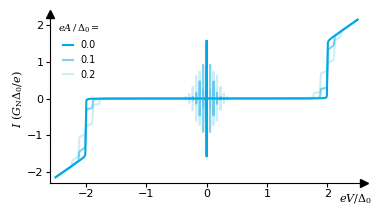

In [70]:
fig, ax = plt.subplots(figsize=(3.8, 2.0))

colors = [get_color(alpha=1.0), get_color(alpha=0.5), get_color(alpha=0.20)]

for i, A in enumerate(A_mV):
    ax.plot(
        V_plot / Delta_meV,
        I_plot[i, :],
        color=colors[i],
        zorder=3 - i,
        label=f"{A/Delta_meV:1.1f}",
    )

ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-2.3, 2.3)
# ax.set_yticks([0, 1, 2, I_C, -1, -2], labels=["0", "1", "2", "$I_\\mathrm{C}$", "--1", "--2"])

ax.legend(
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

xlabel = "$eV/\\Delta_0$"
ylabel = "$I\\ (G_\\mathrm{N}\\Delta_0/e)$"
title = "shapiro-iv"

theory_layout(fig, ax, title, xlabel, ylabel, padding=(0.5, 0.15))

In [ ]:
I = np.array([0, 0.33, 0.66, 1.0])
phi = np.linspace(-10 * np.pi, 10 * np.pi, 201)
U_phi = np.zeros((phi.shape[0], I.shape[0]))
for j, i in enumerate(I):

    U_phi[:, j] = -np.cos(phi) - i * phi

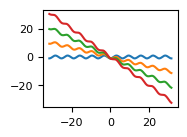

In [97]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.7, 1.2),
)

for j, i in enumerate(I):
    plt.plot(phi, U_phi[:, j])

fig.tight_layout(pad=0.1)
fig.savefig("washboard.pgf")
fig.savefig("washboard.pdf")

In [ ]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

Delta_meV = 0.18
Gamma_meV = 0.0
T_K = 0.0
tau = 1.0
I_C = np.pi / 2
I_sw = I_C / 2
I_r = I_C / 4
V = np.linspace(0, 2.5, 601)
V_mV = V * Delta_meV  # mV

I_BCS = get_I_nA_bcs(
    V_mV=V_mV,
    tau=tau,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    Gamma_meV=Gamma_meV,
) / (Delta_meV * G_0_muS)

I_JJ = V_mV / Delta_meV * 15
I_PD = V_mV / Delta_meV * 0.03

I_SW = np.copy(I_JJ)
I_SW[I_SW > I_sw] = I_sw - I_PD[I_SW > I_sw]
I_SW[I_BCS > I_SW] = I_BCS[I_BCS > I_SW]

I_R = np.copy(I_JJ)
I_R[I_R > I_r] = I_r + I_PD[I_SW > I_r]
I_R[I_BCS > I_R] = I_BCS[I_BCS > I_R]

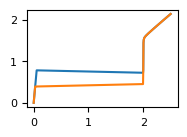

In [144]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.7, 1.2),
)

ax.plot(V, I_SW)
ax.plot(V, I_R)

fig.tight_layout(pad=0.1)
fig.savefig("rcsj-iv.pgf")
fig.savefig("rcsj-iv.pdf")